In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd

# Fetch data for a specific stock (e.g., Apple Inc. AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Display the first few rows of the dataset
print(data.head())

# Save to CSV
data.to_csv('AAPL_stock_data.csv')


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/51/31/72b8f5aa9ed9c4a6afd09c0bab491862ba5837facf7d81e1ed51a555ae8e/yfinance-0.2.44-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 825.8 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.0 MB 1.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565216  132079200


In [3]:
# For Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# For Time-Series Model (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

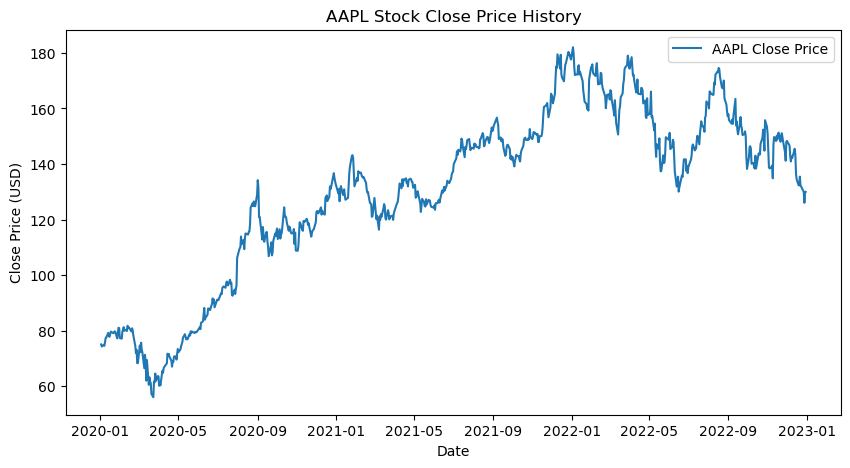

In [5]:
# Plot stock close prices to visualize the trend
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label=f'{ticker} Close Price')
plt.title(f'{ticker} Stock Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [6]:
# Creating a new DataFrame with just the close price
df = pd.DataFrame(data['Close'])

In [7]:
# Create a column for the next 30 days (target variable)
df['Prediction'] = df['Close'].shift(-30)

In [11]:
df.tail(35)

,Close,Prediction
Date,,
2022-11-10,146.869995,131.860001
2022-11-11,149.699997,130.029999
2022-11-14,148.279999,126.040001
2022-11-15,150.039993,129.610001
2022-11-16,148.789993,129.929993
2022-11-17,150.720001,NaN
2022-11-18,151.289993,NaN
2022-11-21,148.009995,NaN
2022-11-22,150.179993,NaN


In [10]:
# Prepare the data for machine learning models
X = np.array(df.drop(['Prediction'], axis=1))  # Features (Close prices)
X = X[:-30]  # Remove the last 30 rows (where Prediction is NaN)

In [12]:
y = np.array(df['Prediction'])  # Target (Prediction)
y = y[:-30]

In [13]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict the stock prices for the test set
rf_predictions = rf.predict(X_test)

In [16]:
# Predict the stock prices for the test set
rf_predictions = rf.predict(X_test)

In [19]:
rf_predictions

array([142.31639771, 153.59339752, 167.31267756,  59.5272509 ,
       165.80520554, 150.38679733,  77.90990189,  94.16585144,
       124.62110031, 128.67999611, 126.23969872,  69.33030045,
       162.71140167,  73.64652512, 132.96879944, 149.75709938,
       149.79756994, 166.49460236, 115.58900177, 154.22990509,
        74.82955299,  69.23774826, 148.94909897,  70.49619812,
        70.35484932, 168.66029877, 160.89448097, 125.41839938,
       131.26890015,  90.32859879,  76.66637535,  79.47247597,
       127.47490143, 127.89630402, 144.19570175, 128.41020142,
       164.05319702, 127.07800041, 125.37449951, 149.2410994 ,
       129.31916328, 122.06719978, 136.11169952, 143.57320053,
       130.97070389, 167.29090469, 133.08520363, 157.95310577,
       124.59439743, 163.48860199, 110.99581961, 160.06190643,
       112.85420135, 142.85310486, 130.3388002 , 152.11199905,
       168.31289536, 111.45274857, 140.19600044, 149.07910233,
       124.62110031, 146.08019455,  84.29919914, 125.58

In [20]:
# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

In [21]:
print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R2: {rf_r2}")

Random Forest - MAE: 10.953350736008389, RMSE: 13.965035946804697, R2: 0.772727147064445


In [22]:
# Support Vector Regressor (SVR)
svm = SVR(kernel='rbf', C=1000, gamma=0.1)
svm.fit(X_train, y_train)

SVR(C=1000, gamma=0.1)

In [23]:
# Predict the stock prices for the test set
svm_predictions = svm.predict(X_test)

In [24]:
# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_r2 = r2_score(y_test, svm_predictions)

In [25]:
print(f"SVM - MAE: {svm_mae}, RMSE: {svm_rmse}, R2: {svm_r2}")

SVM - MAE: 8.957173587835264, RMSE: 13.123405824942337, R2: 0.7992957514282519


In [29]:
# ARIMA Model
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # (p,d,q) values can be tuned
arima_model_fit = arima_model.fit()

In [30]:
# Forecast the next 30 days
arima_forecast = arima_model_fit.forecast(steps=30)

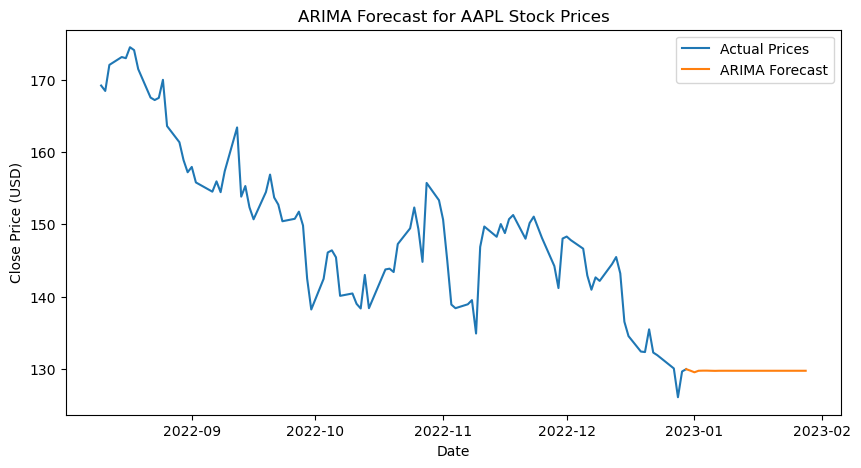

In [31]:
# Plot the forecasted prices
plt.figure(figsize=(10, 5))
plt.plot(df.index[-100:], df['Close'].iloc[-100:], label='Actual Prices')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), arima_forecast, label='ARIMA Forecast')
plt.title(f'ARIMA Forecast for {ticker} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [32]:
# Select the last 30 days of the closing price data as input for future prediction
X_future = np.array(df.drop(['Prediction'], axis=1))[-30:]

In [33]:
# Predict future stock prices using Random Forest model
future_rf_predictions = rf.predict(X_future)

In [34]:
# Create a new DataFrame for future predictions
future_dates = pd.date_range(df.index[-1], periods=31, freq='D')[1:]
future_df = pd.DataFrame(future_rf_predictions, columns=['Predicted Close'], index=future_dates)

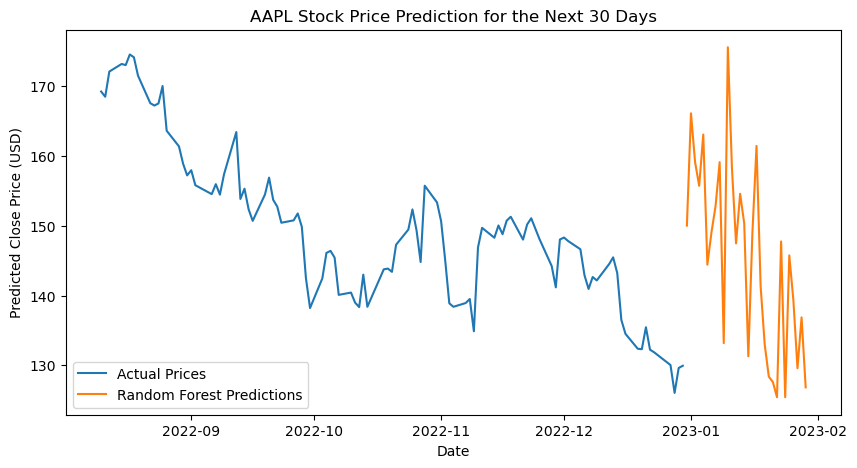

In [35]:
# Plot the predicted future stock prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'][-100:], label='Actual Prices')
plt.plot(future_df.index, future_df['Predicted Close'], label='Random Forest Predictions')
plt.title(f'{ticker} Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price (USD)')
plt.legend()
plt.show()

In [36]:
print(future_df)

            Predicted Close
2022-12-31       150.015903
2023-01-01       166.114001
2023-01-02       159.111997
2023-01-03       155.724798
2023-01-04       163.076302
2023-01-05       144.416499
2023-01-06       149.036504
2023-01-07       152.817500
2023-01-08       159.111997
2023-01-09       133.166499
2023-01-10       175.590601
2023-01-11       158.275503
2023-01-12       147.469310
2023-01-13       154.583300
2023-01-14       150.318102
2023-01-15       131.285000
2023-01-16       149.044705
2023-01-17       161.441099
2023-01-18       141.344899
2023-01-19       132.959399
2023-01-20       128.369501
2023-01-21       127.588400
2023-01-22       125.418399
2023-01-23       147.745396
2023-01-24       125.418399
2023-01-25       145.750211
2023-01-26       139.300000
2023-01-27       129.578165
2023-01-28       136.861998
2023-01-29       126.832803


In [37]:
print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R2: {rf_r2}")
print(f"SVM - MAE: {svm_mae}, RMSE: {svm_rmse}, R2: {svm_r2}")

Random Forest - MAE: 10.953350736008389, RMSE: 13.965035946804697, R2: 0.772727147064445
SVM - MAE: 8.957173587835264, RMSE: 13.123405824942337, R2: 0.7992957514282519
